In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

def mnk( x, y):
    R = np.average([x[i]*y[i] for i in range(len(x))]) - np.average(x) * np.average(y)

    A_coef = R / np.var(x)
    B_coef = np.average(y) - A_coef * np.average(x)

    Delta_a = np.sqrt( 1 / (len( x ) - 2)*(np.var(y)/np.var(x) - A_coef ** 2 ))
    Delta_b = Delta_a * np.sqrt(np.average([z * z for z in x]))

    Eps_a = Delta_a / A_coef
    Eps_b = Delta_b / B_coef
 
    # print(A_coef, B_coef, Delta_a, Delta_b)
    return [ [A_coef, Delta_a, Eps_a], [B_coef, Delta_b, Eps_b] ]

def draw(Size_x, Size_y, x, y, delta_x = 0, delta_y = 0, mnk_opt = True, x_label = "X", y_label = "Y", title = "График", labels = ['name'], legend = False):
    font = {'family': 'serif',
    'color': 'darkred',
    'weight': 'normal',
    'size': 16,
    }
    color = ["red", "blue", "orange", "green"]
    plt.figure(figsize=[Size_x, Size_y])
    plt.grid()
    plt.title(title, fontdict=font)
    plt.ylabel(y_label, fontdict=font)
    plt.xlabel(x_label, fontdict=font)
    if (type(x[0]) is float) or (type(x[0]) is int):
        plt.plot( x, y, 'o', label = labels, color = color[0])

        x_mnk = [np.amin(x), np.amax(x)]
        coef = mnk( x, y)
        y_mnk = [coef[0][0]*z + coef[1][0] for z in x_mnk]
        plt.plot(x_mnk, y_mnk,'-', color = color[0])
    else:
        for i in range(len(x)):
            plt.plot( x[i], y[i], 'o', label = labels[i], color = color[i])

            x_mnk = [np.amin(x[i]), np.amax(x[i])]
            coef = mnk( x[i], y[i])
            y_mnk = [coef[0][0]*z + coef[1][0] for z in x_mnk]
            plt.plot(x_mnk, y_mnk,'-', color = color[i])

    plt.legend()

    #plt.tight_layout()
    plt.show()


### Цель работы:
C помощью сцинтилляционного счетки измерить линейные коэффициенты ослабления потока $\gamma$-лучей в свинце, железе и алюминии; по их велечине определить энергию $\gamma$-квантов.

### Теоретическая часть
Гамма-лучи возникают при переходе возбужденных ядер из одного энергетического состояния в другое, более низкое. Энергия $\gamma$-квантов обычно заключена между несколькими десятками килоэлектронвольт и несколькими миллионами электрон-вольт. Гамма-кванты не несут электрического заряда, их масса равна нулю. Проходя, через вещество, пучок $\gamma$-квантов постепенно ослабляется. Ослабление просходит по експоненциальному закону, который может быть записан в следующей форме:

$$
		I = I_0 e^{-\mu l},
$$

,где $I$, $I_0$ -- интенсивности прошедшего и падающего излучений; $l$ -- длина пути, пройденного пучком $\gamma$-лучей; $\mu$ -- коэффициент ослабления потока в веществе.
	
Ослабление потока $\gamma$-лучей, происходящее при прохождении среды, связано с тремя эффектами: фотоэлектрическим поглощением, комптоновским рассеянием и с генерацией электрон-позитронных пар.
	
В случае опытов, поставленных в хорошей геометрии, при прохождении $\gamma$-лучей через вещество меняет только количество, но не энергия $\gamma$-квантов в пучке, так что коэффициент $\mu$, характеризующий поглощение $\gamma$-квантов в веществе, не зависит от длины пути. Обозначим через $-dN$ число $\gamma$-квантов, выбывших их пучка на пути $dl$. Это число пропорционально имеющемуся их числу $N$ и пройденному пути $dl$. Cледовательно,

$$
		-dN = \mu N \, dl.
$$

Интегрируя уравнение от нулевой толщины до заданной, получим

$$
N = N_0 e^{-\mu l}.
$$

Вообще говоря, в плохой геометрии, когда рассеянные под небольшими углами $\gamma$-кванты остаются в пучке, их спектр с прохождением вещества меняется, поэтому формула непреминима. Однако в этом случае она работает лучше, чем можно было ожидать.
	
В данной работе коэффициент ослабления $\mu$ измеряется в хорошей геометрии. Из формулы~(\ref{eq3}) имеем:

$$
		\mu = \frac{1}{l} \ln \frac{N_0}{N}.
$$

Для определения коэффициента ослабления нужно, таким образом, измерить толщтну образца $l$, число падающих частиц $N_0$ и число частиц $N$, прошедших через образец.
	
### Экспериментальная установка
Схема установки
![1.png](1.png)

Свинцовый коллиматор выделяет узкий почти параллельный пучок $\gamma$-квантов, проходящий через набор поглотителей П и регистрируемый сцинтиляцонным счетчиком. Сигналы от счетчика усиливаются и регистрируются пересчетным прибором ПП. Высоковольтный выпрямитель ВВ обеспечивает питание сцинтилляционного счетчика.

При недостаточно хорошей геометрии в результаты опытов могут вкрасться существенные погрешности. В реальных установках всегда имеется конечная вероятность того, что $\gamma$-квант провзаимодействует в поглотителе несколько раз до того, как попадет в детектор (пути таких квантов показаны на рис 2. Чтобы уменьшить число таких случаев, в данной работе сцинтилляционный счетчик расположен на большом расстоянии от источиника $\gamma$-квантов, а поглотители имеют небольшие размеры. Их следует устанавливать за коллиматорной щелью на некотором расстоянии друг от друга, чтобы испытавшие комптоновское рассеяние и выбывшие из прямого потока кванты с меньшей вероятностью могли в него вернуться.

![2.png](2.png)

### Экспериментальные данные


<IPython.core.display.Javascript object>


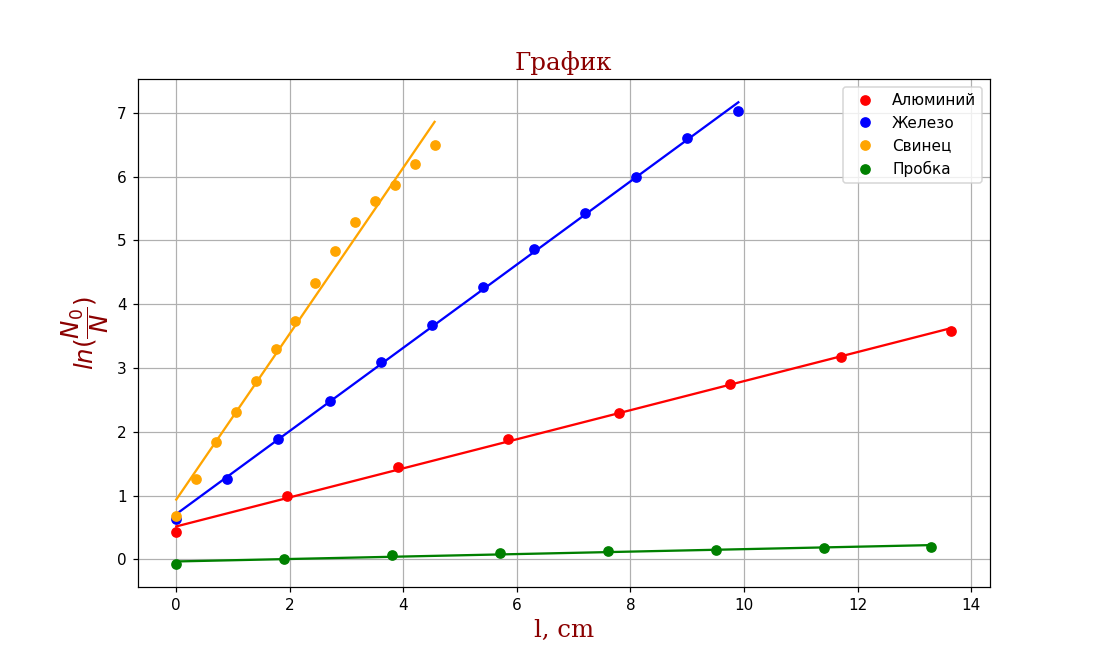

mu_ Алюминий  =  0.228  +-  0.004 , E =  1.7  % 
mu_ Железо  =  0.652  +-  0.006 , E =  0.9  % 
mu_ Свинец  =  1.301  +-  0.037 , E =  2.8  % 
mu_ Пробка  =  0.019  +-  0.002 , E =  11.2  % 


In [25]:
Al =      np.array([71498, 40967.3333333333, 25755.3333333333, 16648.6666666667, 11138.6666666667, 7111.33333333333, 4728.66666666667, 3159.66666666667])
Al_err =  np.array([2136.41, 138.37, 221.00, 176.65, 153.21, 115.86, 42.24, 17.93])

Fer =     np.array([58623.25, 31220.67, 16613.33, 9238.33, 5066.33, 2900.00, 1652.67, 959.50, 598.00, 395.75, 268.75, 217.50])
Fer_err = np.array([869.71, 172.40, 81.56, 93.05, 31.67, 43.37, 30.30, 26.17, 19.76, 22.65, 17.67, 5.17])

Pb =      np.array([55903.00, 31217.50, 17415.75, 10987.50, 6853.75, 4193.25, 2733.25, 1568.50, 988.00, 675.50, 516.50, 428.25, 343.25, 284.80])
Pb_err =  np.array([367.38, 337.59, 229.63, 79.89, 86.93, 33.70, 81.41, 33.51, 39.57, 17.61, 19.56, 8.29, 25.99, 10.30])

Pr =      np.array([118581.00, 108651.00, 102706.67, 99283.25, 96248.50, 94150.00, 91718.50, 89940.25])
Pr_err =  np.array([3414.95, 1196.07, 415.09, 442.11, 343.95, 143.10, 264.37, 402.86])

fon =     120.40
fon_err = 16.35

n0 =      109550.00
n0_err =  7851.95

Al_width = 1.95 #sm
Fer_width = 0.9 #sm
Pb_width = 0.35 #sm
Pr_width = 1.9 #sm

Al = Al - fon;
Fer = Fer - fon;
Pb = Pb - fon;
Pr = Pr - fon;
Al_err = Al_err + fon_err;
Fer_err = Fer_err + fon_err;
Pb_err = Pb_err + fon_err;
Pr_err = Pr_err + fon_err;

Al_err = Al_err/Al
Fer_err = Fer_err/Fer
Pb_err = Pb_err/Pb
Pr_err = Pr_err/Pr

Al_log = np.log(n0/Al)
k_Al = np.arange(len(Al_log))

Fer_log = np.log(n0/Fer)
k_Fer = np.arange(len(Fer_log))

Pb_log = np.log(n0/Pb)
k_Pb = np.arange(len(Pb_log))

Pr_log = np.log(n0/Pr)
k_Pr = np.arange(len(Pr_log))

x = [k_Al*Al_width, k_Fer*Fer_width, k_Pb*Pb_width, k_Pr*Pr_width]
y = [Al_log, Fer_log, Pb_log, Pr_log]
y_err = [Al_err, Fer_err, Pb_err, Pr_err]
labels = ['Алюминий','Железо', 'Свинец', 'Пробка']
draw(10, 6, x, y,delta_x = 0, delta_y = y_err, mnk_opt = True, x_label = "l, cm", y_label = "$ln(\dfrac{N_0}{N})$", title = "График", labels = labels, legend = False)
for i in range(4):
    coef = mnk( x[i], y[i])
    print("mu_", labels[i]," = ", round(coef[0][0], 3), " +- ", round(coef[0][1], 3), ", E = ", round(coef[0][2]*100, 1)," % ")




по таблице в лабнике получаем энергию г кванта 0.5 МэВ для аллюминия и железа и 0.6 МэВ для свинца.
получается среднее значение 0.56МэВ